# Compare Tests for Goodness of fit (on real data)

## Test whether a gaussian model N ($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

### Use 2 tests: KS, AD, KL, chisq to do this.

### Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

In [88]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
from pandas import DataFrame
import scipy.stats
from scipy.stats import norm
import seaborn


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [68]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [69]:
getCitiBikeCSV('201505')
getCitiBikeCSV('201506')
getCitiBikeCSV('201507')
getCitiBikeCSV('201508')

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [70]:
data_2015_05 = pd.read_csv('/home/cusp/nm2762/PUIdata/201505-citibike-tripdata.csv')
data_2015_06 = pd.read_csv('/home/cusp/nm2762/PUIdata/201506-citibike-tripdata.csv')
data_2015_07 = pd.read_csv('/home/cusp/nm2762/PUIdata/201507-citibike-tripdata.csv')
data_2015_08 = pd.read_csv('/home/cusp/nm2762/PUIdata/201508-citibike-tripdata.csv')

In [71]:
frames = [data_2015_05, data_2015_06, data_2015_07, data_2015_08]
results = pd.concat(frames)
results = results.reset_index(drop=True)
results = results.drop (['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid'], axis=1)

In [72]:
results = results[results['gender'] != 0]
results['age'] = 2015 - results['birth year']

In [73]:
results = results.drop (['gender'], axis=1)

In [74]:
results =results.drop(['usertype','birth year'], axis=1 )
results = results.reset_index(drop=True)


In [75]:
results['age'].dropna(inplace=True)
mean = results.age.mean()
std = results.age.std()
arr = np.linspace(0,results.age.max(),100)


# Normal

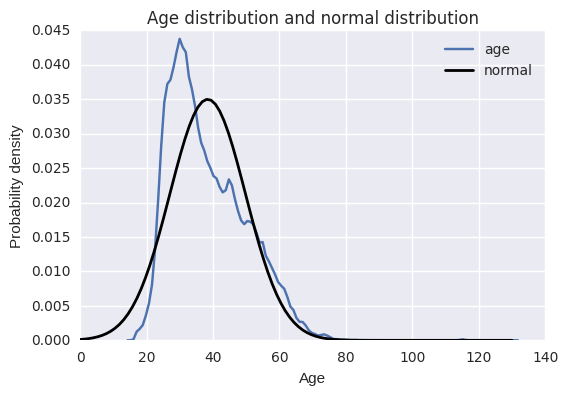

In [92]:
p = normpdf(arr, mean, std)

seaborn.kdeplot(results.age,legend=True)
plt.plot(arr, p, 'k', linewidth=2,label='normal')
plt.title('Age distribution and normal distribution')
plt.xlabel('Age')
plt.ylabel('Probability density')
plt.legend()


#plt.figure (figsize=(8,4)).add_subplot(111)




In [93]:
scipy.stats.mstats.normaltest(results.age)

NormaltestResult(statistic=245765.76469950346, pvalue=0.0)

In [97]:
normal = np.random.normal(mean, std, size = len(results.age))

## KS

In [100]:
scipy.stats.ks_2samp(results.age,normal)

Ks_2sampResult(statistic=0.106742430647677, pvalue=0.0)

## Chisquare

In [101]:
scipy.stats.chisquare(results.age, normal)

Power_divergenceResult(statistic=54098092.177706681, pvalue=0.0)

#  Chisquare Distribution

In [122]:
chisquare_teoretical = np.random.chisquare(mean, size = len(results.age))


## KS

In [118]:
scipy.stats.ks_2samp(results.age,chisquare_teoretical)

Ks_2sampResult(statistic=0.1398267924809151, pvalue=0.0)

## Chisquare 

In [119]:
scipy.stats.chisquare(results.age, chisquare_teoretical)

Power_divergenceResult(statistic=19678253.671781227, pvalue=0.0)